<a href="https://colab.research.google.com/github/Andikadreams/PCVK_Semester5_2023/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

D. LATIHAN PRAKTIKUM

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, buat notebook baru dan beri nama“Week11.ipynb”.
Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan
cara sebagai berikut.

Metode yang digunakan :

1. Template Matching
2. Edge Detection
3. Corner Detection
4. Grid Detection
5. Contour Detection

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan
gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

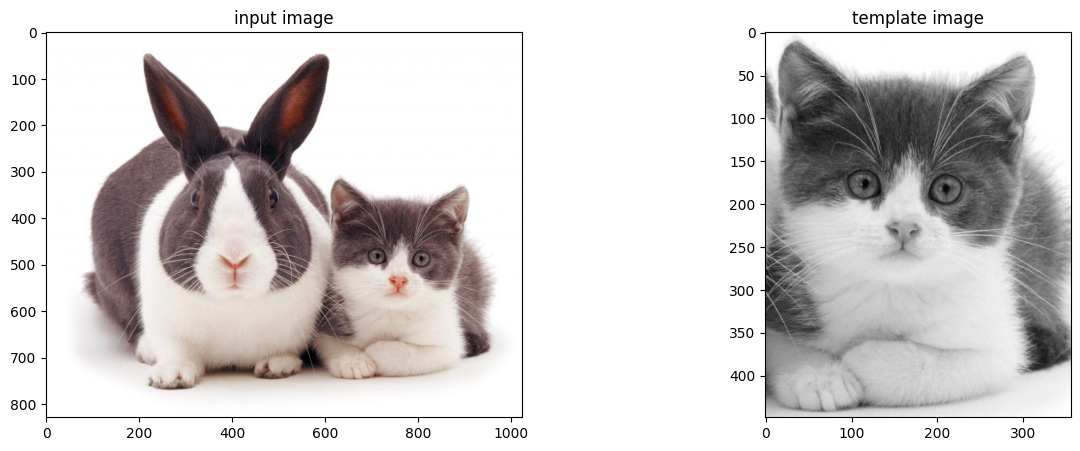

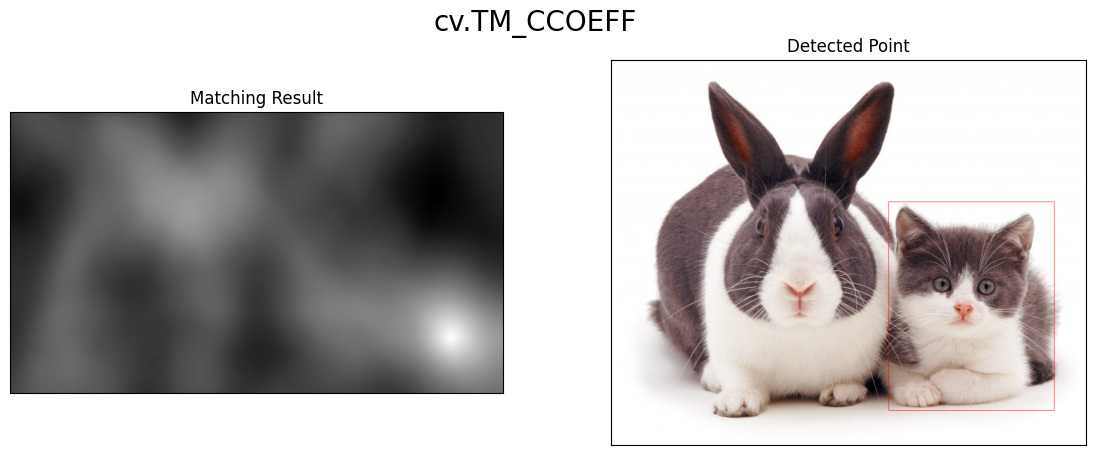

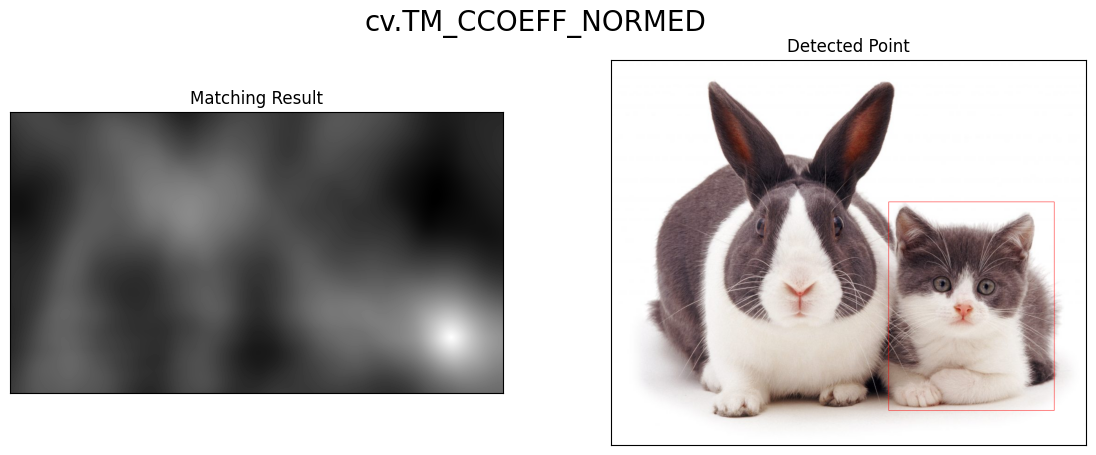

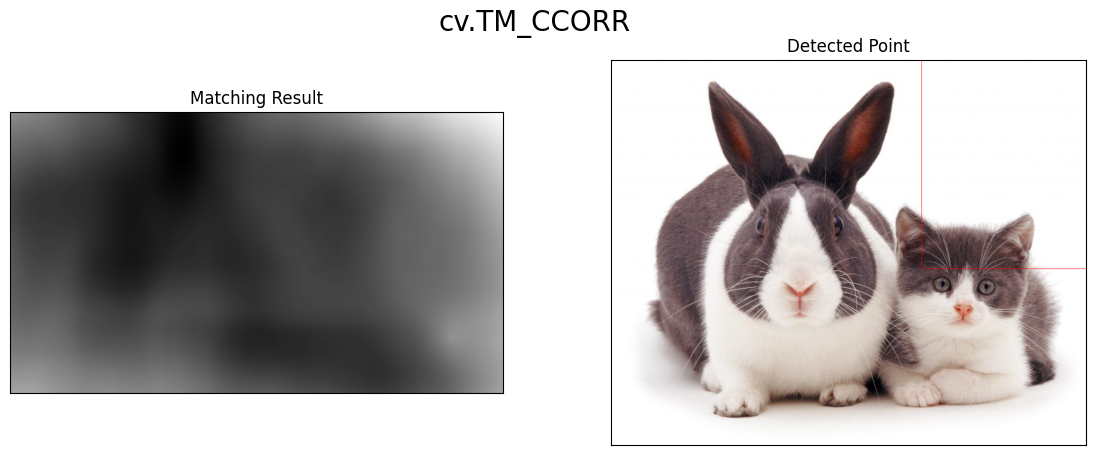

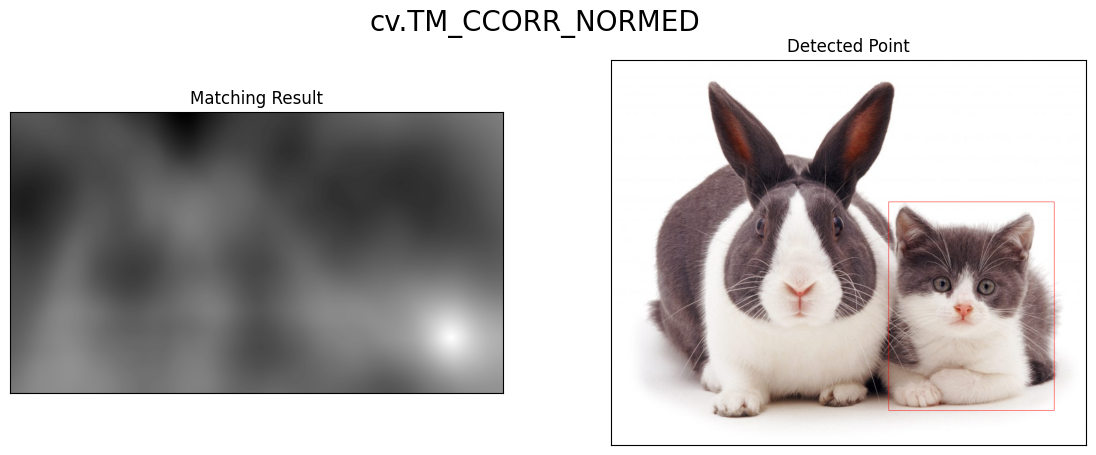

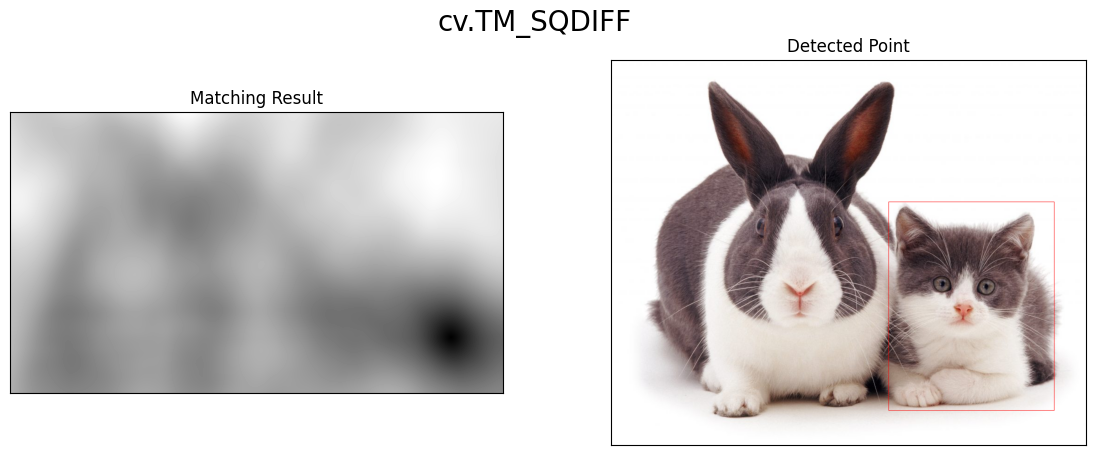

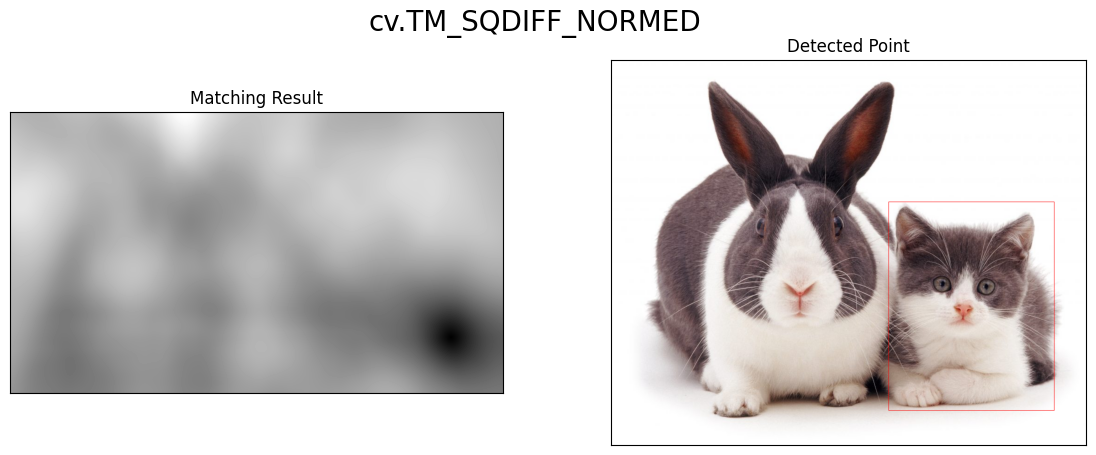

In [ ]:
# load citra input
img = cv.imread('/content/drive/MyDrive/PCVK/Images/Object_detection/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2 = img.copy()

#load citra template
template = cv.imread('/content/drive/MyDrive/PCVK/Images/Object_detection/cat2_templatejpg.jpg',0)
# dimensi citra
w, h = template.shape[::-1]

# print input image dan template
f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right,(0,0,255))
    plt.figure(figsize=(14,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()

3. Implementasikan konsep template matching tanpa menggunakan library OpenCV

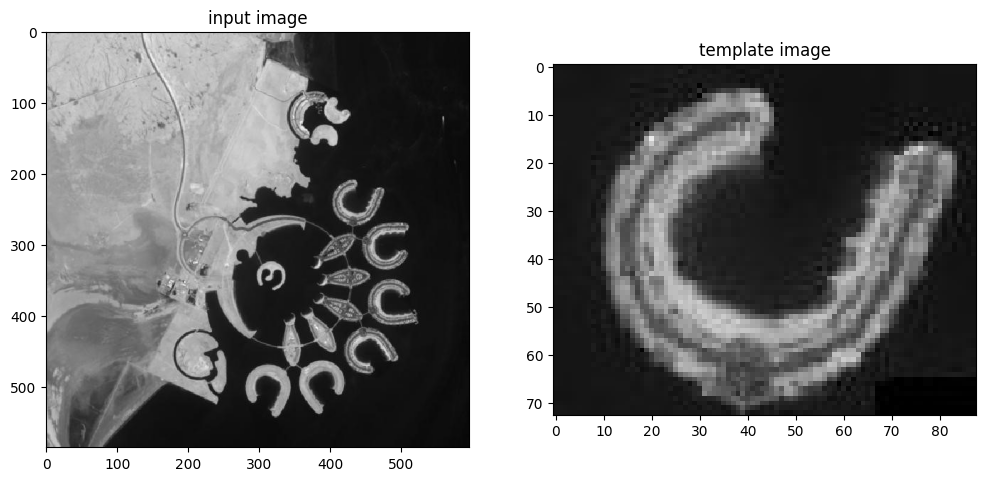

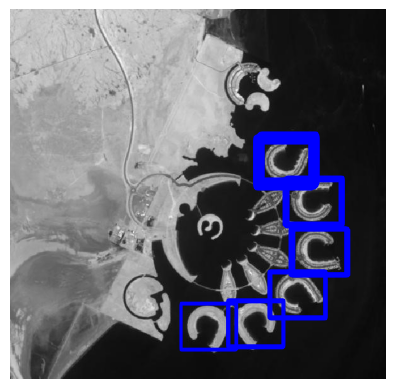

In [ ]:
from PIL import Image

# Load images
input_image = Image.open('/content/drive/MyDrive/PCVK/Images/Object_detection/bahrain.jpg')
template_image = Image.open('/content/drive/MyDrive/PCVK/Images/Object_detection/bahrain-template.jpg')

# Menampilkan citra input dan citra template
input_image.show()
template_image.show()

from skimage.feature import match_template

img = cv.imread('/content/drive/MyDrive/PCVK/Images/Object_detection/bahrain.jpg', 0)
template = cv.imread('//content/drive/MyDrive/PCVK/Images/Object_detection/bahrain-template.jpg', 0)

f, axarr = plt. subplots(1,2,figsize=(12,8))
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# Hitung kemiripan citra dengan citra template
result = match_template(img, template)

# Tentukan threshold untuk menentukan hasil match
threshold = 0.45
locations = np.where(result >= threshold)

# Plot hasil match
fig, ax = plt.subplots()
ax.imshow(img, cmap=plt.cm.gray)
ax.set_axis_off()
height, width = template.shape
for loc in zip(*locations[::-1]):
    rect = plt.Rectangle(loc, width, height, edgecolor='blue', facecolor='none', linewidth=1)
    ax.add_patch(rect)
plt.show()

4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan LaplacianEdge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga menghasilkan luaran sebagai berikut:

*   Sobel Edge Detection
*   Canny Edge Detection
*   Laplacian Edge Detection

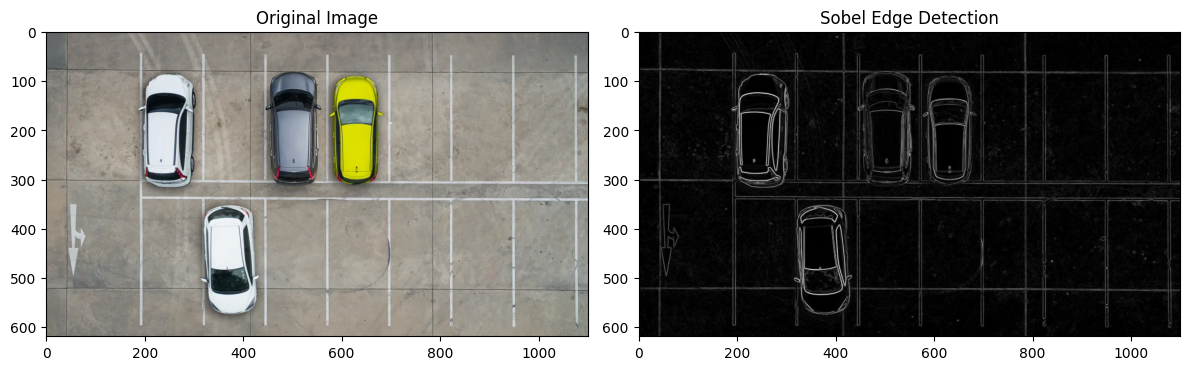

In [ ]:
img= cv.imread('/content/drive/MyDrive/PCVK/Images/Object_detection/car-park.jpg')

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

img_car = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# Sobel Edge Detection
sobel_x = cv.Sobel(img_gray, cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(img_gray, cv.CV_64F, 0, 1, ksize=3)
sobel_combined = cv.magnitude(sobel_x, sobel_y)

# Tampilkan gambar asli dan hasil deteksi tepi
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(img_car)
plt.title('Original Image')
plt.axis('on')

plt.subplot(2, 2, 2)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('on')

plt.tight_layout()
plt.show()

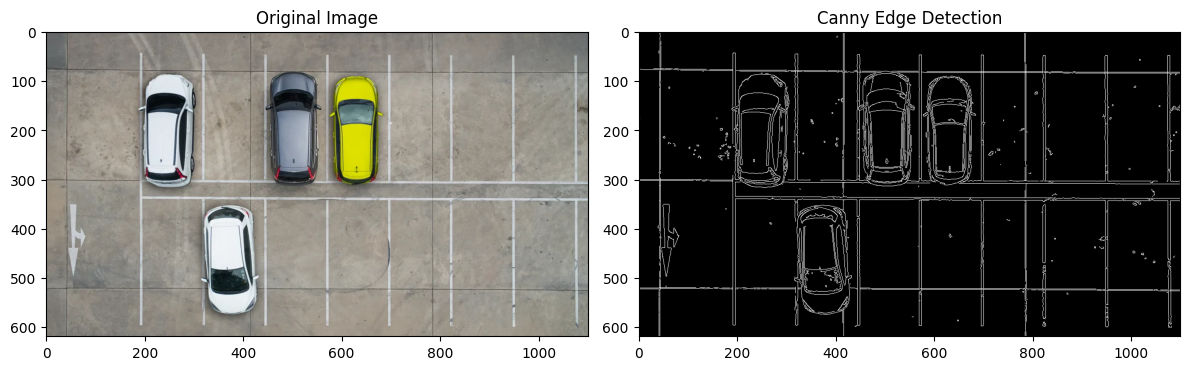

In [ ]:
# Canny Edge Detection
canny = cv.Canny(img_gray, 100, 200)

# Tampilkan gambar asli dan hasil deteksi tepi
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(img_car)
plt.title('Original Image')
plt.axis('on')

plt.subplot(2, 2, 2)
plt.imshow(canny, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('on')

plt.tight_layout()
plt.show()

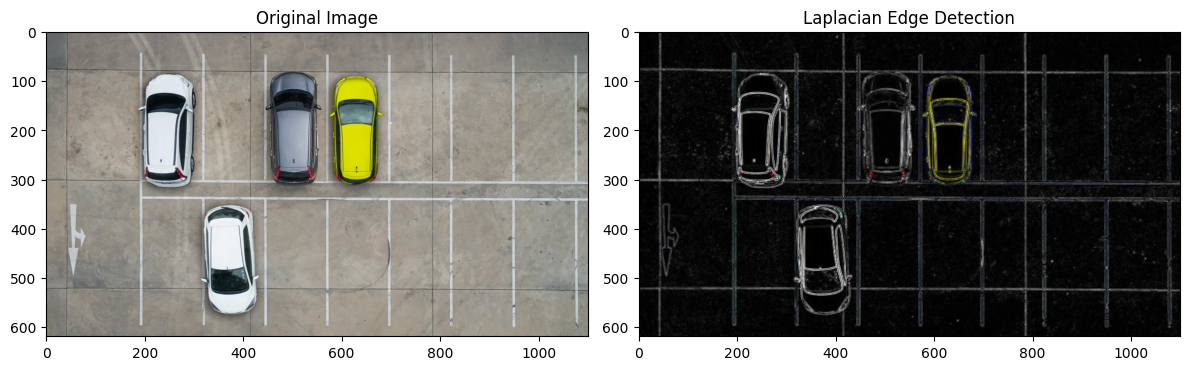

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

car_park = cv.imread('/content/drive/MyDrive/PCVK/Images/Object_detection/car-park.jpg')

# Reduce noise in image
img_car_noise = cv.GaussianBlur(car_park, (3, 3), 0)

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image = cv.Laplacian(img_car_noise, cv.CV_16S, ksize=3)

# Converting back to uint8
filtered_image = cv.convertScaleAbs(filtered_image)

# Tampilkan gambar asli dan hasil deteksi tepi
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(car_park, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('on')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(filtered_image, cv.COLOR_BGR2RGB))
plt.title('Laplacian Edge Detection')
plt.axis('on')

plt.tight_layout()
plt.show()

5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada
OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan
luaran sebagai berikut:

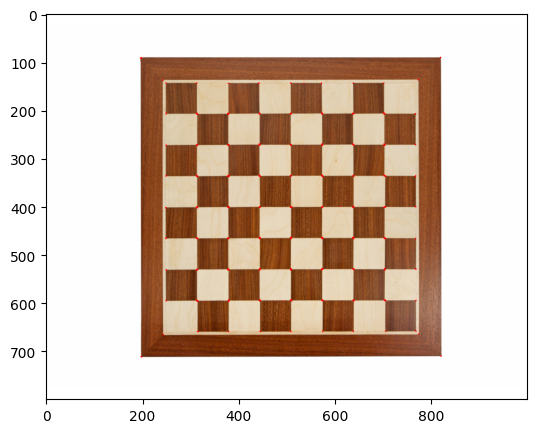

In [ ]:
# Nomor 5 (a)

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#load citra input
input_img = cv.imread('/content/drive/MyDrive/PCVK/Images/Object_detection/chess-board.jpg')
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(gray_img,3,1,0.04)

gray_img = np.float32(gray_img)
harris_output = cv.cornerHarris(gray_img,2,3, 3)
#hasil harris corner dilakukan dilasi untuk menandai sudut
harris_output = cv.dilate(harris_output, None)

#Threshold untuk mengoptimalkan nilai
input_img[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(10,5))
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

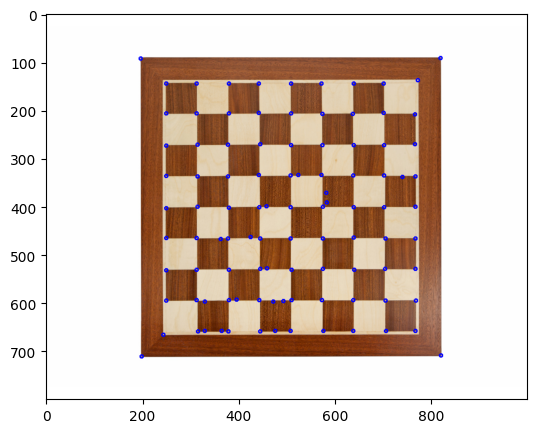

In [ ]:
# Nomor 5 (b)
input_img = cv.imread('/content/drive/MyDrive/PCVK/Images/Object_detection/chess-board.jpg')
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray_img, 100,0.01,10)
corners = np. int0(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(input_img, (x,y),3,255,2)

plt.figure(figsize=(10,5))
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

6. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan
gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan
teori, sehingga menghasilkan luaran sebagai berikut:

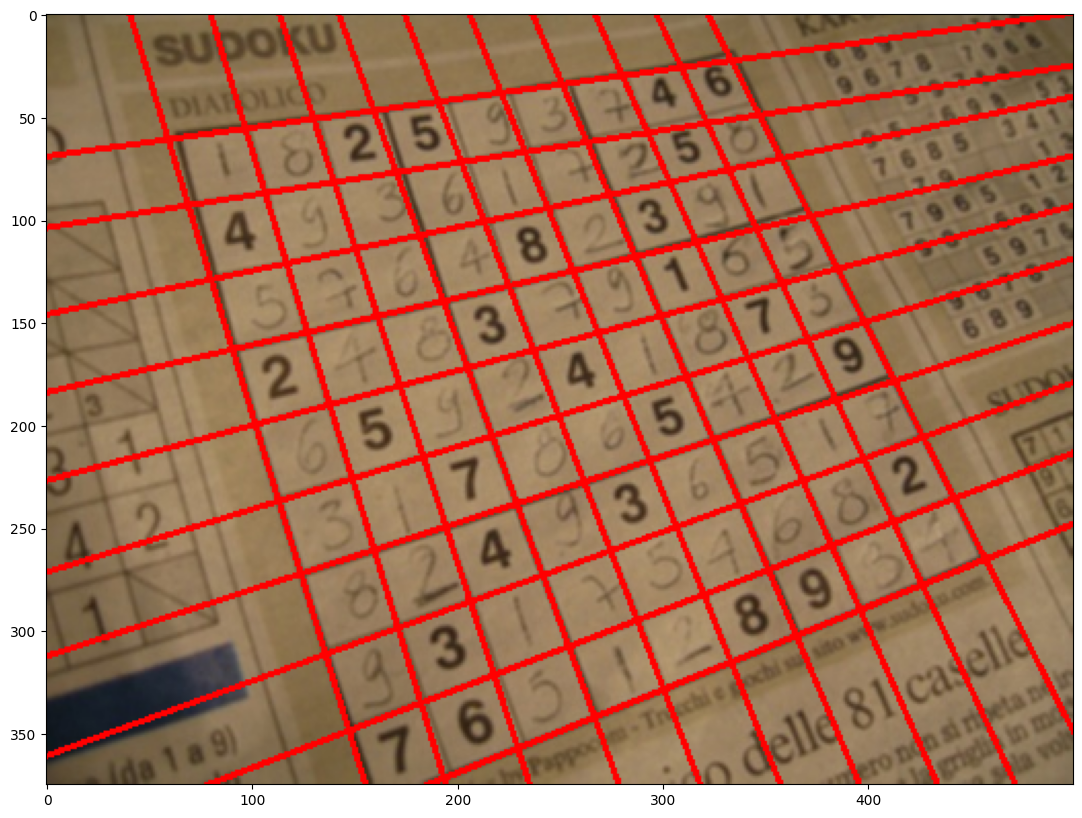

In [ ]:
input_img = cv.imread('/content/drive/MyDrive/PCVK/Images/Object_detection/sudoku.jpg')
img_gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

edges = cv.Canny (img_gray, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8)
edges = cv.dilate(edges,kernel,iterations = 1)

kernel = np.ones((5,5), np.uint8)
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges,1,np.pi/180,150)


if lines is None or not lines.any():
    print('No lines were found')
    exit()

rho_threshold = 15
theta_threshold = 0.1

# Filter garis yang serupa
similar_lines = {i: [] for i in range(len(lines))}
for i in range(len(lines)):
    for j in range(len(lines)):
        if i == j:
            continue
        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

indices = [i for i in range(len(lines))]
indices.sort(key=lambda x: len(similar_lines[x]))

line_flags = len(lines) * [True]
for i in range(len(lines) - 1):
    if not line_flags[indices[i]]:
        continue
    for j in range(i + 1, len(lines)):
        if not line_flags[indices[j]]:
            continue
        rho_i, theta_i = lines[indices[i]][0]
        rho_j, theta_j = lines[indices[j]][0]
        if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
            line_flags[indices[j]] = False

filtered_lines = [lines[i] for i in range(len(lines)) if line_flags[i]]

for line in filtered_lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv.line(input_img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Menampilkan gambar dengan garis yang terdeteksi
plt.figure(figsize=(20, 10))
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))
plt.axis('on')
plt.show()

7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan
menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:

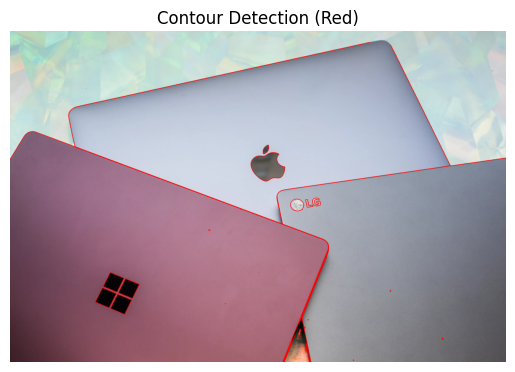

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Baca gambar laptop.jpg
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/Object_detection/laptop.jpg')

# Konversi gambar ke citra skala abu-abu
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Deteksi tepi menggunakan Canny
edges = cv2.Canny(gray, 30, 200)

# Temukan kontur menggunakan findContours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Gambar kontur pada gambar asli (menggunakan warna merah)
cv2.drawContours(img, contours, -1, (0, 0, 255), 3)

# Tampilkan hasil deteksi kontur
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Contour Detection (Red)')
plt.axis('off')
plt.show()


Kelompok 1 :
1. Afifah Salsabila Yuswanti
2. Andika Ainur Wibowo
3. Arainal Aldiansyah
4. Braman Tyamahendrawan
5. Dimas Putra Anhar Wirjo Atmodjo

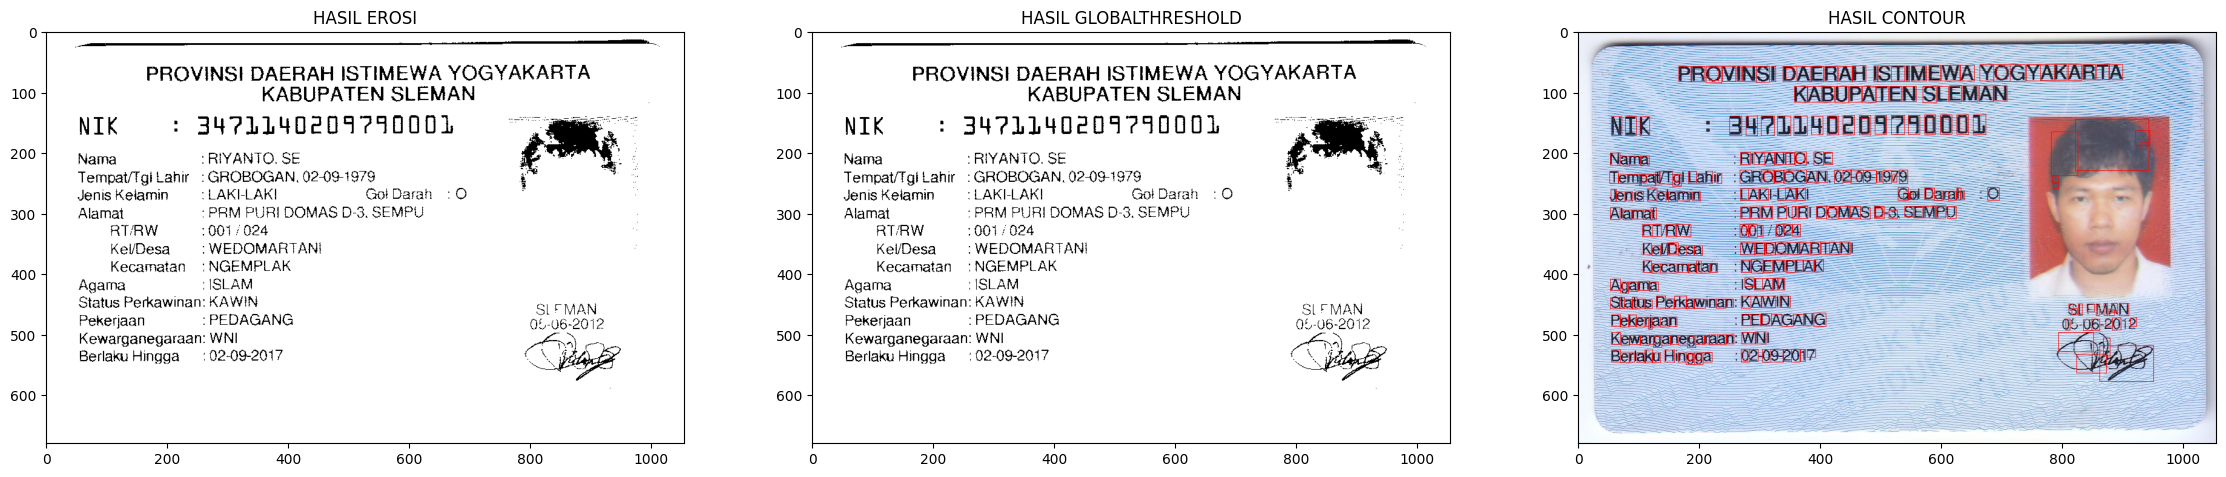

In [83]:
from google.colab.patches import cv2_imshow
ktp = cv.imread("/content/drive/MyDrive/PCVK/Images/KTP_week7/ktp.png")

# Fungsi Global Thresholding
def global_thresholding(image, threshold):
    binary = np.zeros_like(image)
    binary[image > threshold] = 255
    return binary

# blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

# Gray
gray = cv.cvtColor(ktp, cv.COLOR_BGR2GRAY)
# ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Global Thresholding dengan v=90
global_threshold = global_thresholding(gray, 90)

# Erosi
erode = cv.dilate(global_threshold.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 10 and w >= 6 and float(ras) <= 7:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    # if h >= 20 and w >= 15 and float(ras) <= 10:
    #   cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 255, 0), thickness=2)


      #cv.drawContours(ktp, contours, -1, (0, 255, 0), 2)

# Menampilkan gambar KTP dengan kontur menggunakan plt
ktp_rgb = cv.cvtColor(ktp, cv.COLOR_BGR2RGB)
erode = cv.cvtColor(erode, cv.COLOR_GRAY2RGB)
global_threshold = cv.cvtColor(global_threshold, cv.COLOR_GRAY2RGB)

plt.figure(figsize=(28, 10))  # Ukuran gambar
plt.subplot(1, 3, 1)  # Subplot pertama
plt.title('HASIL EROSI')
plt.imshow(erode)
plt.subplot(1, 3, 2)  # Subplot kedua
plt.title('HASIL GLOBALTHRESHOLD')
plt.imshow(global_threshold)
plt.subplot(1, 3, 3)  # Subplot ketiga
plt.title('HASIL CONTOUR')
plt.imshow(ktp_rgb)

Text(0.5, 1.0, 'HASIL CONTOUR')

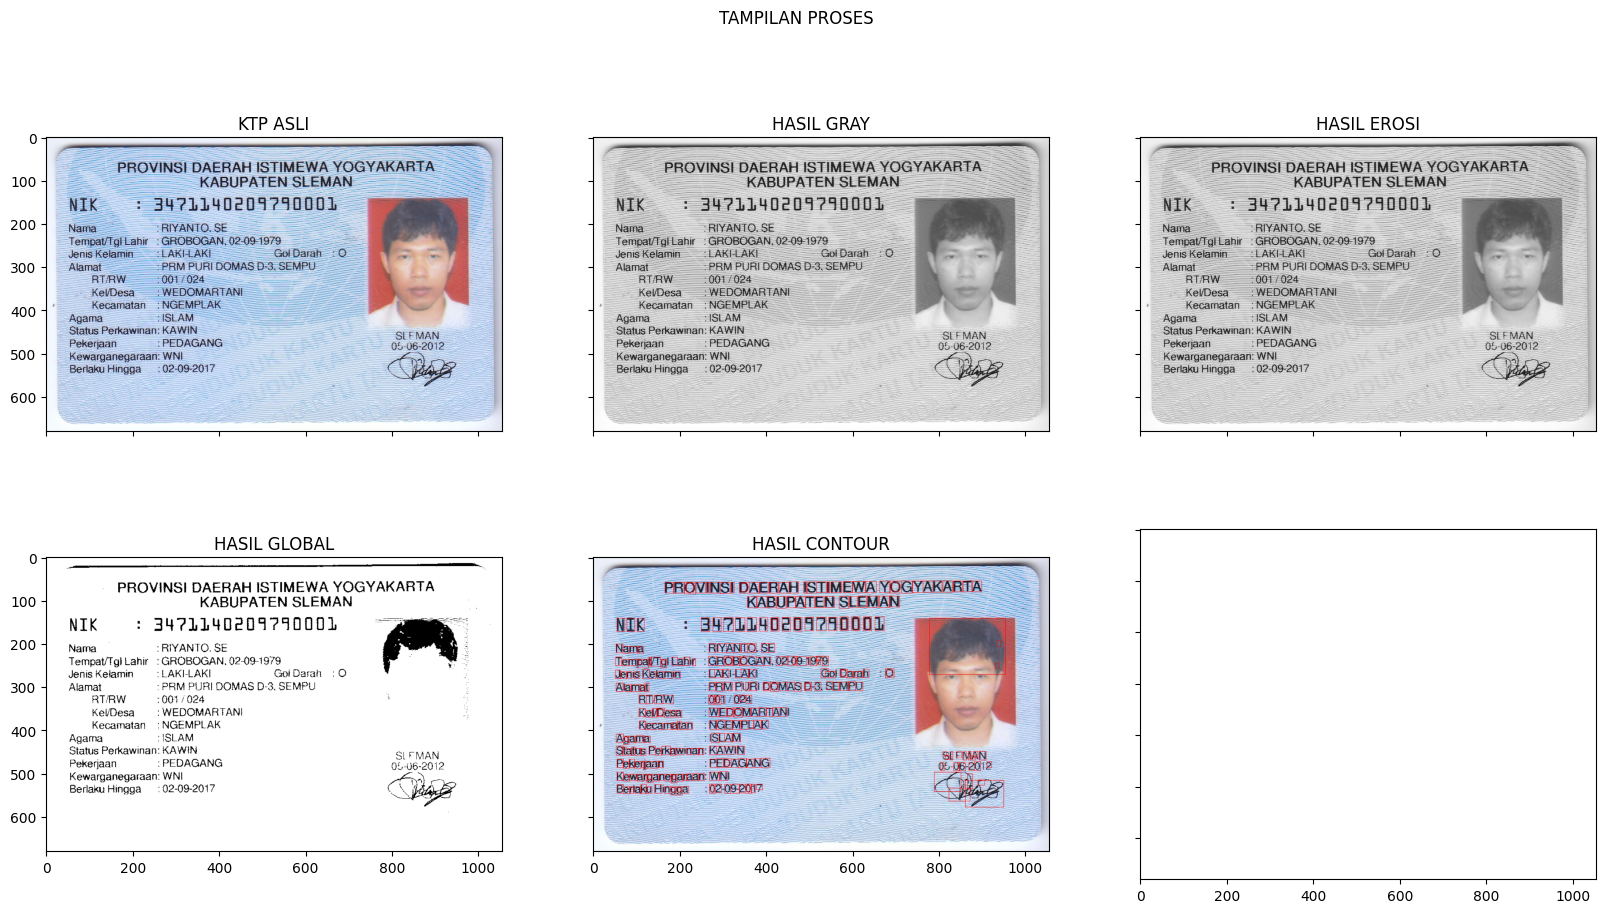

In [94]:
from google.colab.patches import cv2_imshow
ktp_asli = cv.imread("/content/drive/MyDrive/PCVK/Images/KTP_week7/ktp.png")
ktp = cv.imread("/content/drive/MyDrive/PCVK/Images/KTP_week7/ktp.png")

# Fungsi Global Thresholding
def global_thresholding(image, threshold):
    binary = np.zeros_like(image)
    binary[image > threshold] = 255
    return binary

# GaussianBlur
# blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

# GrayColor
gray = cv.cvtColor(ktp, cv.COLOR_BGR2GRAY)

# ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Erosi
erode = cv.erode(gray.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Global Thresholding dengan v=90
global_threshold = global_thresholding(erode, 100)

# ret, thres = cv.threshold(global_threshold, 127, 255, cv.THRESH_BINARY)
# kernel = np.ones((3,3),np.uint8)
# opening = cv.morphologyEx(thres, cv.MORPH_OPEN, kernel)

# Ekstraksi kontur
contours, hierarchy = cv.findContours(global_threshold.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 10 and w >= 6 and float(ras) <= 7:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    # if h >=4  and w >= 4 and float(ras) <= 3:
    #   cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)


      #cv.drawContours(ktp, contours, -1, (0, 255, 0), 2)

# Menampilkan gambar KTP dengan kontur menggunakan plt
ktp_rgb = cv.cvtColor(ktp, cv.COLOR_BGR2RGB)
erode = cv.cvtColor(erode, cv.COLOR_GRAY2RGB)
global_threshold = cv.cvtColor(global_threshold, cv.COLOR_GRAY2RGB)
ktp_asli = cv.cvtColor(ktp_asli, cv.COLOR_BGR2RGB)
# opening = cv.cvtColor(opening, cv.COLOR_BGR2RGB)
# blurred = cv.cvtColor(blurred, cv.COLOR_BGR2RGB)

fig, axs = plt.subplots(2, 3, figsize=[20, 10], sharex=True, sharey=True)
fig.suptitle('TAMPILAN PROSES')
axs[0, 0].imshow(ktp_asli)
axs[0, 0].set_title('KTP ASLI')
# axs[0, 1].imshow(blurred)
# axs[0, 1].set_title('HASIL BLUR')
axs[0, 1].imshow(gray,cmap='gray')
axs[0, 1].set_title('HASIL GRAY')
axs[0, 2].imshow(erode)
axs[0, 2].set_title('HASIL EROSI')
axs[1, 0].imshow(global_threshold)
axs[1, 0].set_title('HASIL GLOBAL')
# axs[1, 1].imshow(opening)
# axs[1, 1].set_title('HASIL OPENING')
axs[1, 1].imshow(ktp_rgb)
axs[1, 1].set_title('HASIL CONTOUR')